# Feature Aggregation with AFX

This notebook demonstrates how to use the AFX library to extract and aggregate audio features from real audio files. We will use AFX's API for feature extraction, aggregation, and visualization.

In [1]:
import os
from AFX.io.io import load_audio
from AFX.utils.config_loader import load_config
from AFX.extract_all import extract_all_features
from AFX.utils.aggregator import aggregate_features
from AFX.utils.visualization import plot_mfcc, plot_feature_distribution

## Load Audio and Config

We will load a real audio file from the `data/` directory and the default AFX config.

In [2]:
# Select an audio file and config
AUDIO_PATH = os.path.join('..', 'data', '7383-3-0-0.wav')
CONFIG_PATH = os.path.join('..', 'AFX', 'config.json')
config = load_config(CONFIG_PATH)
signal, sr = load_audio(AUDIO_PATH, sr=config['sample_rate'])
print(f'Loaded audio: {AUDIO_PATH}, shape: {signal.shape}, sample rate: {sr}')

Loaded audio: ..\data\7383-3-0-0.wav, shape: (88200,), sample rate: 22050


## Extract Features with AFX

Extract all features specified in the config using AFX's unified API.

In [3]:
features = extract_all_features(signal, sr, config)
print('Extracted features:', list(features.keys()))

Extracted features: ['zcr', 'variance', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'melspectrogram', 'mfcc', 'mfcc_delta', 'chroma_cqt', 'pitch', 'thd', 'hnr', 'gfcc']


## Aggregate Features

Aggregate frame-level features to clip-level using AFX's aggregation utilities.

In [4]:
agg_features = aggregate_features(features, method='mean', flatten=True, normalize='zscore')
for k, v in agg_features.items():
    print(f'{k}: shape {v.shape}')

zcr: shape (169,)
variance: shape (1,)
spectral_centroid: shape (169,)
spectral_bandwidth: shape (169,)
spectral_rolloff: shape (169,)
melspectrogram: shape (128,)
mfcc: shape (65,)
mfcc_delta: shape (65,)
chroma_cqt: shape (60,)
pitch: shape (169,)
thd: shape (1,)
hnr: shape (169,)
gfcc: shape (13,)


In [5]:
from AFX.utils import features_to_vector

# Stack all features into a single vector (option 1: via features_to_vector)
feature_vector = features_to_vector(agg_features, flatten=False)
print('Final feature vector shape:', feature_vector.shape)

# Stack all features directly using the aggregation pipeline (option 2)
stacked_vector = aggregate_features(features, method='stack')
print('Stacked feature vector shape:', stacked_vector.shape)

Final feature vector shape: (1347,)
Stacked feature vector shape: (1347,)


## Other Aggregation Methods

AFX supports other aggregation methods such as standard deviation, statistical summary, and stacking.

In [6]:
agg_std = aggregate_features(features, method='std', flatten=True)
agg_summary = aggregate_features(features, method='summary', flatten=True)
print('Standard deviation aggregation:')
for k, v in agg_std.items():
    print(f'{k}: shape {v.shape}')
print('\nStatistical summary aggregation:')
for k, v in agg_summary.items():
    print(f'{k}: shape {v.shape}')

Standard deviation aggregation:
zcr: shape (169,)
variance: shape (1,)
spectral_centroid: shape (169,)
spectral_bandwidth: shape (169,)
spectral_rolloff: shape (169,)
melspectrogram: shape (128,)
mfcc: shape (65,)
mfcc_delta: shape (65,)
chroma_cqt: shape (60,)
pitch: shape (169,)
thd: shape (1,)
hnr: shape (169,)
gfcc: shape (13,)

Statistical summary aggregation:
zcr_mean: shape (169,)
zcr_std: shape (169,)
variance_mean: shape (1,)
variance_std: shape (1,)
spectral_centroid_mean: shape (169,)
spectral_centroid_std: shape (169,)
spectral_bandwidth_mean: shape (169,)
spectral_bandwidth_std: shape (169,)
spectral_rolloff_mean: shape (169,)
spectral_rolloff_std: shape (169,)
melspectrogram_mean: shape (128,)
melspectrogram_std: shape (128,)
mfcc_mean: shape (65,)
mfcc_std: shape (65,)
mfcc_delta_mean: shape (65,)
mfcc_delta_std: shape (65,)
chroma_cqt_mean: shape (60,)
chroma_cqt_std: shape (60,)
pitch_mean: shape (169,)
pitch_std: shape (169,)
thd_mean: shape (1,)
thd_std: shape (1,)
h

## Visualize Features

Use AFX's visualization utilities to feature distributions.

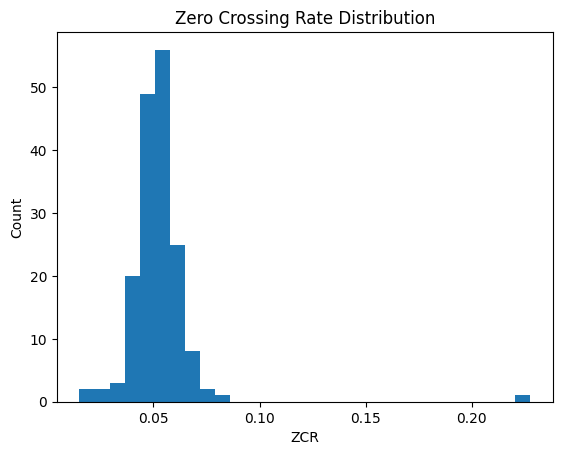

In [7]:
# plot histogram for ZCR if 1D
import matplotlib.pyplot as plt
plt.hist(features['zcr'].ravel(), bins=30)
plt.title('Zero Crossing Rate Distribution')
plt.xlabel('ZCR')
plt.ylabel('Count')
plt.show()

## Summary

This notebook demonstrated how to use the AFX library to extract, aggregate, and visualize audio features from real audio files. For more advanced usage, see the AFX documentation and other notebooks.